In [74]:
#data analysing phase
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import datetime
from datetime import timedelta

In [75]:
independent_feature = pd.read_csv(r"C:\Users\El-Wattaneya\Desktop\ml_project\ml_project\application_record.csv")
independent_feature.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [76]:
#let's see independent feature size
independent_feature.shape

(438557, 18)

In [77]:
dependent_feature = pd.read_csv(r"C:\Users\El-Wattaneya\Desktop\ml_project\ml_project\credit_record.csv")
dependent_feature.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [78]:
dependent_feature.shape

(1048575, 3)

In [79]:
data = independent_feature.merge(dependent_feature,how='inner',on=['ID'])



In [80]:
data.head(12)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-5,C
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-6,C
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-7,C
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-8,C
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-9,C


In [81]:
data.shape

(777715, 20)

In [82]:
data['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [83]:
data['NAME_INCOME_TYPE'].value_counts()

Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: NAME_INCOME_TYPE, dtype: int64

In [84]:
data['DAYS_EMPLOYED'].value_counts()

 365243    127972
-1751        1601
-1539        1545
-401         1498
-2531        1319
            ...  
-3294           1
-3891           1
-7049           1
-7765           1
-2848           1
Name: DAYS_EMPLOYED, Length: 3640, dtype: int64

In [85]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [87]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [88]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()
print(correlation_matrix)



                        ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  \
ID                1.000000      0.026269         -0.027597    0.042020   
CNT_CHILDREN      0.026269      1.000000          0.039304    0.356177   
AMT_INCOME_TOTAL -0.027597      0.039304          1.000000    0.081231   
DAYS_BIRTH        0.042020      0.356177          0.081231    1.000000   
DAYS_EMPLOYED    -0.025322     -0.228945         -0.180674   -0.608856   
FLAG_MOBIL             NaN           NaN               NaN         NaN   
FLAG_WORK_PHONE   0.084800      0.042226         -0.021229    0.180658   
FLAG_PHONE        0.006346     -0.018882          0.018687   -0.026717   
FLAG_EMAIL       -0.056083      0.015726          0.085776    0.100945   
CNT_FAM_MEMBERS   0.027375      0.892079          0.031379    0.327750   
MONTHS_BALANCE    0.005007      0.000913          0.001831    0.035756   

                  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  \
ID                    -0.025322    

<AxesSubplot: >

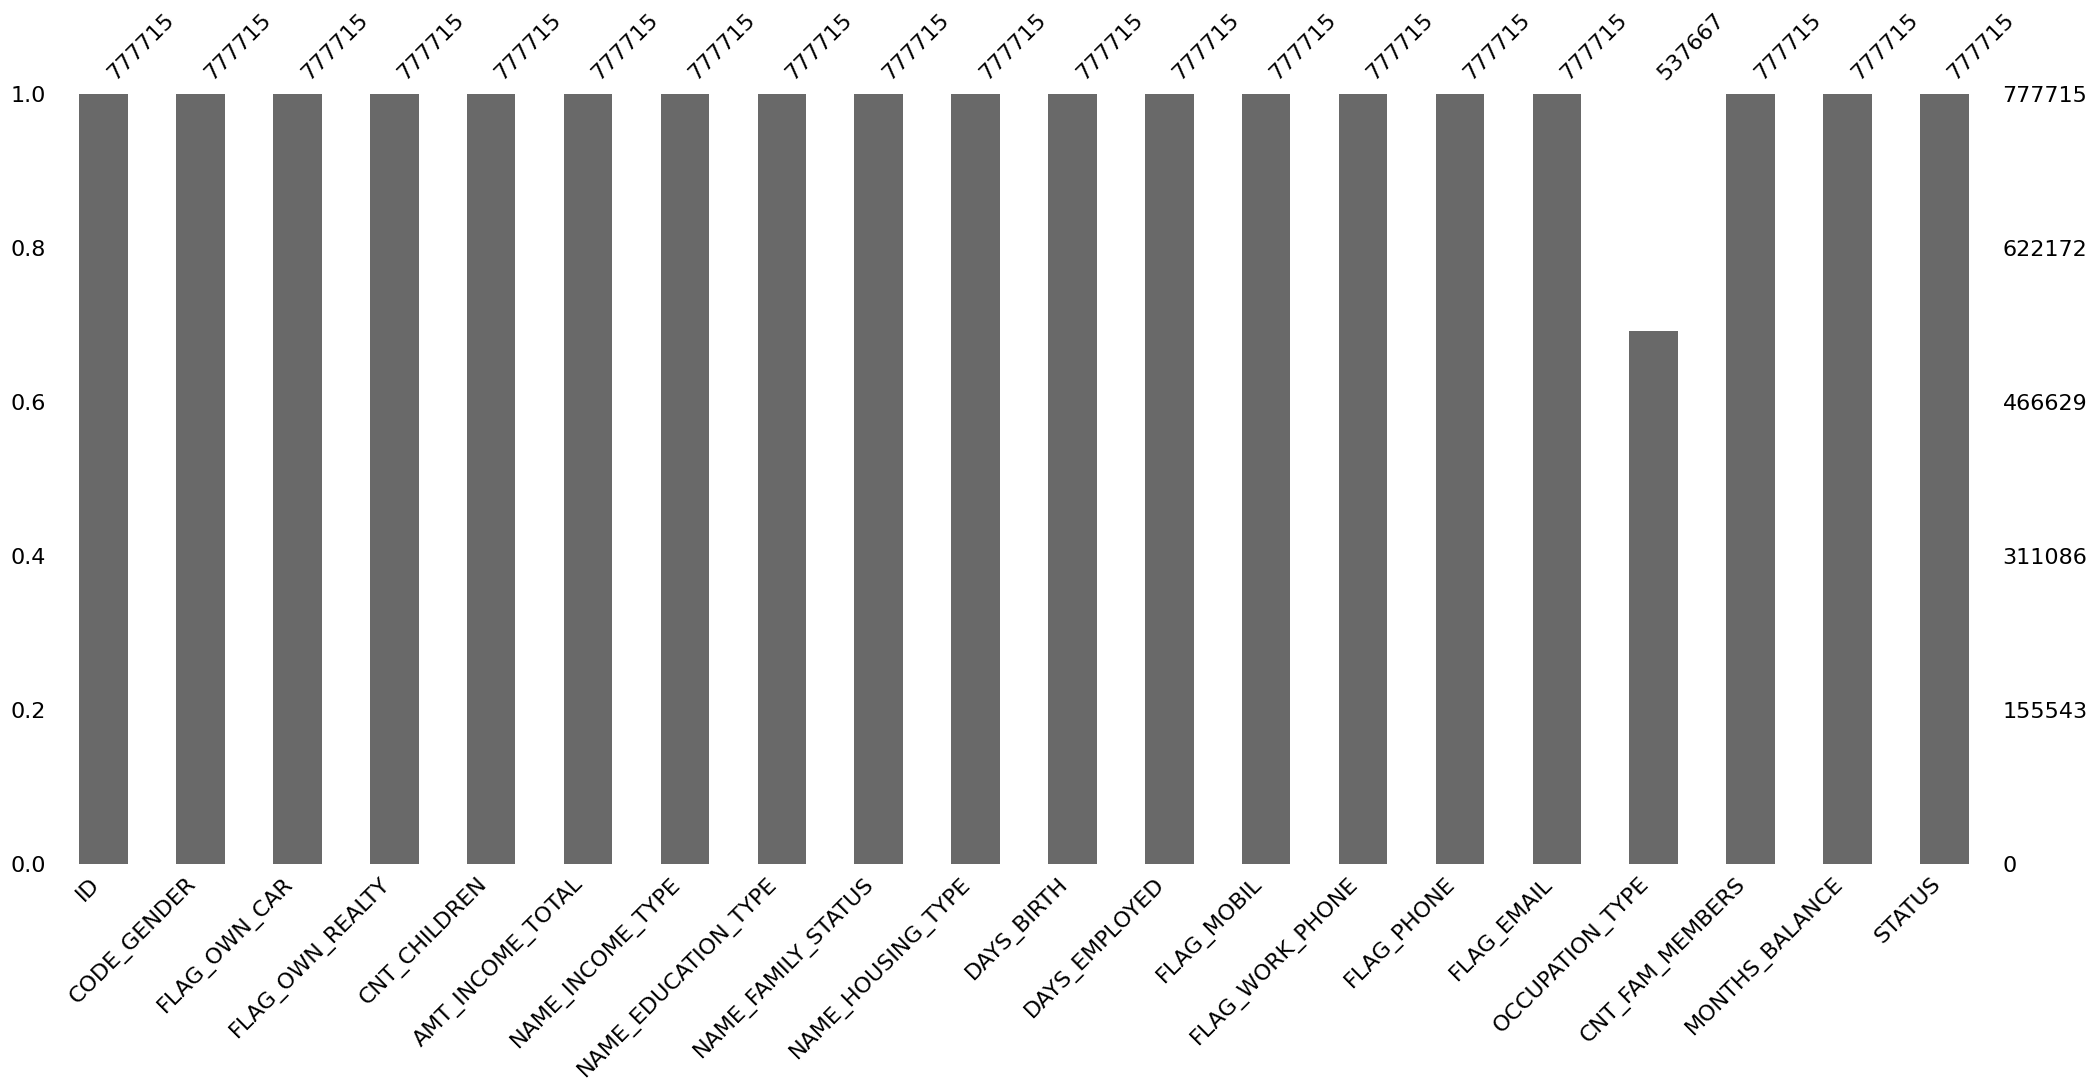

In [89]:
msno.bar(data)

In [90]:
data.isnull().sum().sort_values(ascending=False)


OCCUPATION_TYPE        240048
ID                          0
CODE_GENDER                 0
MONTHS_BALANCE              0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
FLAG_MOBIL                  0
DAYS_EMPLOYED               0
DAYS_BIRTH                  0
NAME_HOUSING_TYPE           0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
AMT_INCOME_TOTAL            0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
STATUS                      0
dtype: int64

<AxesSubplot: >

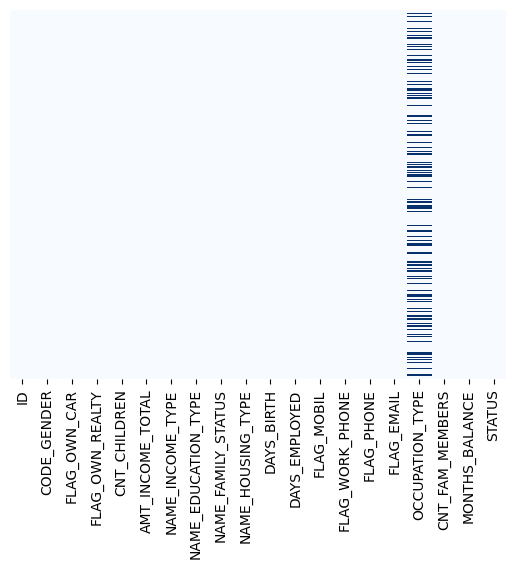

In [91]:
call=data.columns
sns.heatmap(data[call].isnull(),cmap='Blues',yticklabels=False,cbar=False)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_WORK_PHONE      777715 non-null  int64  
 13  FLAG_PHONE           777715 non-null  int64  
 14  FLAG_EMAIL           777715 non-null  int64  
 15  OCCUPATION_TYPE  

In [102]:
data.duplicated().sum()

0

In [103]:
#FLAG_MOBIL column is not correlated to any feature so let's drop the that column
data.drop('FLAG_MOBIL',inplace=True,axis=1)

KeyError: "['FLAG_MOBIL'] not found in axis"

In [104]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,-4,C


In [105]:
data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE        240048
ID                          0
DAYS_BIRTH                  0
MONTHS_BALANCE              0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
DAYS_EMPLOYED               0
NAME_HOUSING_TYPE           0
CODE_GENDER                 0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
AMT_INCOME_TOTAL            0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
STATUS                      0
dtype: int64

In [106]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [107]:
data['OCCUPATION_TYPE'].fillna('Other',inplace=True)

In [108]:
data['OCCUPATION_TYPE'].value_counts()

Other                    240048
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [109]:
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [110]:
data.head(4)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-3,C


In [111]:
data['CODE_GENDER'].value_counts()

F    518851
M    258864
Name: CODE_GENDER, dtype: int64

In [112]:
male= pd.get_dummies(data['CODE_GENDER'],drop_first=True)

In [113]:
male.value_counts()

M
0    518851
1    258864
dtype: int64

In [114]:
car= pd.get_dummies(data['FLAG_OWN_CAR'],drop_first=True)

In [115]:
car.value_counts()

Y
0    473355
1    304360
dtype: int64

In [116]:
Property= pd.get_dummies(data['FLAG_OWN_REALTY'],drop_first=True)

In [117]:
Property.value_counts()

Y
1    512948
0    264767
dtype: int64

In [118]:
data['NAME_INCOME_TYPE'].value_counts()

Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: NAME_INCOME_TYPE, dtype: int64

In [119]:
pd.concat([data,male,car,Property],axis=1)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,M,Y,Y
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,0,C,1,1,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-1,C,1,1,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-2,C,1,1,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-3,C,1,1,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-4,C,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-9,0,1,0,1
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-10,2,1,0,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-11,1,1,0,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-12,0,1,0,1


In [120]:
data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: NAME_EDUCATION_TYPE, dtype: int64

In [121]:
def education(x):
    if x=='Secondary / secondary special':
        x=x.split(' / ')[0]
    return x

In [122]:
data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].apply(education)

In [123]:
data['NAME_EDUCATION_TYPE'].value_counts()

Secondary            524261
Higher education     213633
Incomplete higher     30329
Lower secondary        8655
Academic degree         837
Name: NAME_EDUCATION_TYPE, dtype: int64

In [124]:
data['NAME_FAMILY_STATUS'].value_counts()

Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: NAME_FAMILY_STATUS, dtype: int64

In [125]:
def fun(x):
    if x=='Single / not married':
        x=x.split(' / ')[0]
    return x
    

In [126]:
data['NAME_FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].apply(fun)


In [127]:
data['NAME_FAMILY_STATUS'].value_counts()

Married           546619
Single             94335
Civil marriage     60342
Separated          45255
Widow              31164
Name: NAME_FAMILY_STATUS, dtype: int64

In [128]:
# This function takes no of days and convert it into their datetime format
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

## This Function takes value of colunn Days of Employed and convert it into datetime format
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')

In [129]:
data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(Date_of_Birth)


In [130]:
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(Date_of_Birth)
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-16,2011-07-24,1,0,0,Other,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-16,2011-07-24,1,0,0,Other,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-16,2011-07-24,1,0,0,Other,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-16,2011-07-24,1,0,0,Other,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-16,2011-07-24,1,0,0,Other,2.0,-4,C


In [131]:
#lets drop gender ,flag_own_car,flag_own_realty columns as we have create another columns for them
data.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'],inplace=True,axis=1)
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-16,2011-07-24,1,0,0,Other,2.0,0,C
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-16,2011-07-24,1,0,0,Other,2.0,-1,C
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-16,2011-07-24,1,0,0,Other,2.0,-2,C
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-16,2011-07-24,1,0,0,Other,2.0,-3,C
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-16,2011-07-24,1,0,0,Other,2.0,-4,C


In [132]:
#let's create a function to calculate age of the employee
def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age=today.year-dateofbirth.year
    return age


In [133]:
data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(AGE)
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,2011-07-24,1,0,0,Other,2.0,0,C
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,2011-07-24,1,0,0,Other,2.0,-1,C
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,2011-07-24,1,0,0,Other,2.0,-2,C
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,2011-07-24,1,0,0,Other,2.0,-3,C
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,2011-07-24,1,0,0,Other,2.0,-4,C


In [134]:
data.rename(columns={'DAYS_BIRTH':'Age'},inplace=True)


In [135]:
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(AGE)
data.head(2)


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,0,C
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-1,C


In [136]:
data.rename(columns={'DAYS_EMPLOYED':'Days_worked'})

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,Days_worked,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,0,C
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-1,C
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-2,C
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-3,C
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,Working,Secondary,Single,Rented apartment,25,3,0,0,0,Laborers,1.0,-9,0
777711,5150337,0,112500.0,Working,Secondary,Single,Rented apartment,25,3,0,0,0,Laborers,1.0,-10,2
777712,5150337,0,112500.0,Working,Secondary,Single,Rented apartment,25,3,0,0,0,Laborers,1.0,-11,1
777713,5150337,0,112500.0,Working,Secondary,Single,Rented apartment,25,3,0,0,0,Laborers,1.0,-12,0


In [137]:
data['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [138]:
data.loc[data['STATUS']=='C','STATUS']=6
data.loc[data['STATUS']=='X','STATUS']=7
data['STATUS']=data['STATUS'].astype(float)

In [139]:
def solve(state):
    target=''
    if state in (2,3,4,5):
        target=1 #Risky
    else :
        target=0 #not Risky
        
    return target
    

In [140]:
data.drop('OCCUPATION_TYPE',axis=1,inplace=True)

# MOdel

In [141]:
data['Target']=data['STATUS'].apply(solve)
###########################################################################

In [142]:
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,0,6.0,0
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,-1,6.0,0
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,-2,6.0,0
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,-3,6.0,0
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,-4,6.0,0


In [143]:
data['Target'].value_counts()

0    774887
1      2828
Name: Target, dtype: int64

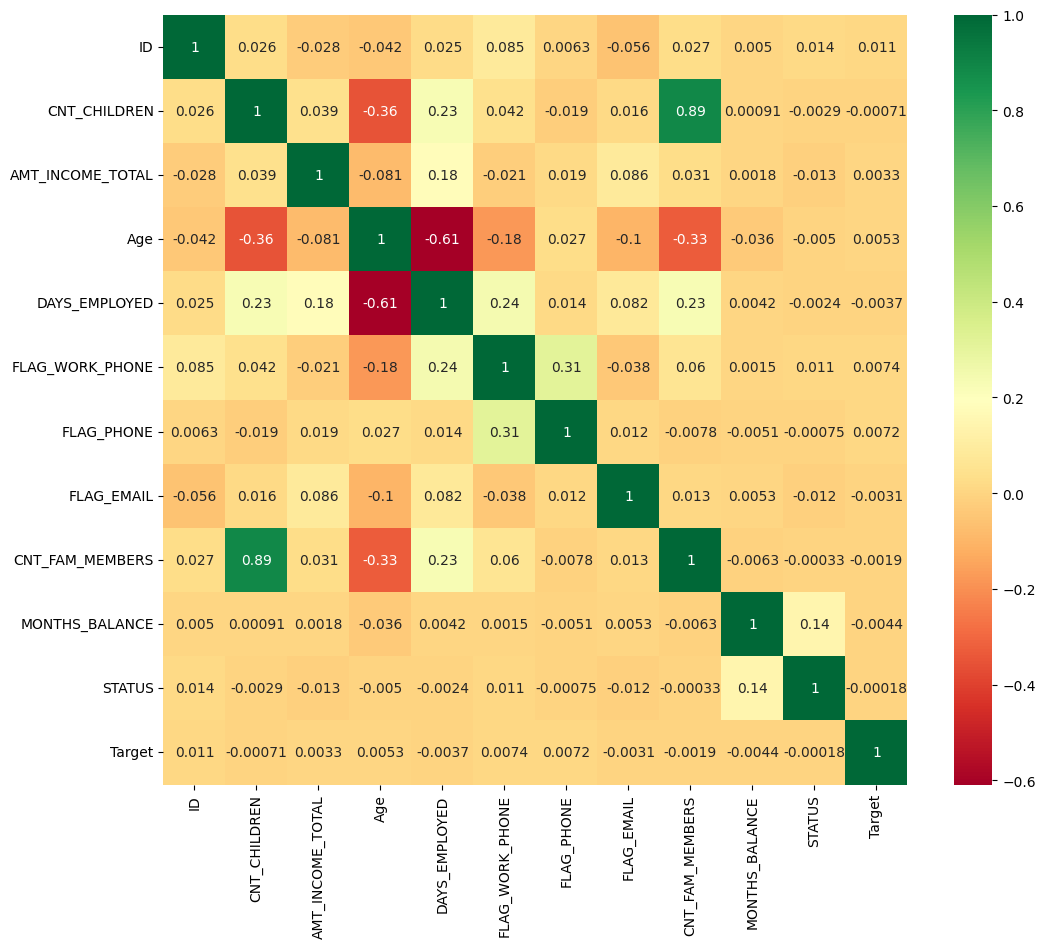

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'data'
# Replace 'your_dataset.csv' with the actual filename if you're loading from a CSV file
# data = pd.read_csv('your_dataset.csv')

# Select only numeric columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='RdYlGn')
plt.show()


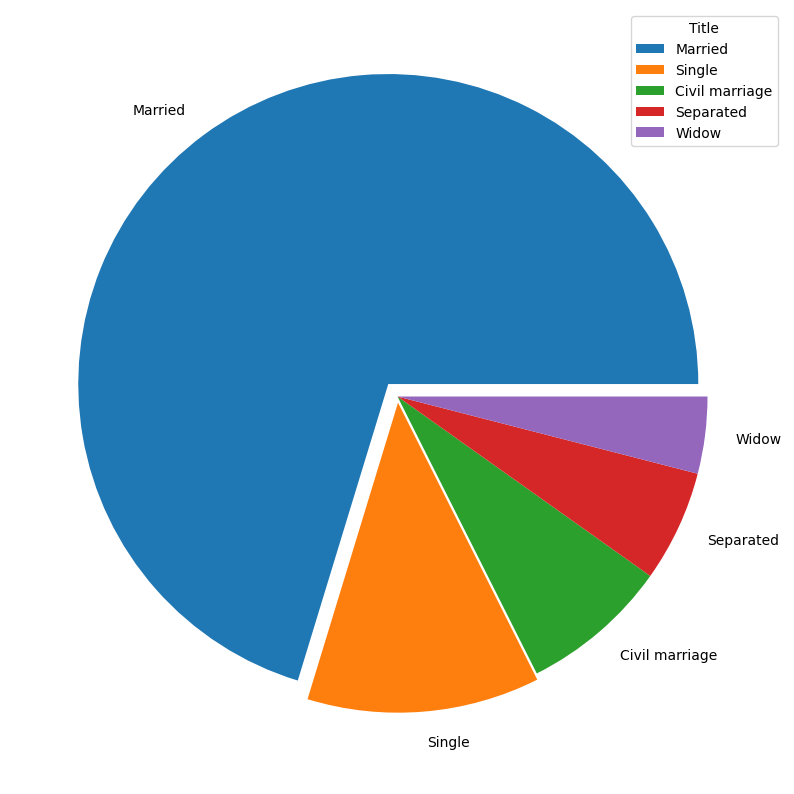

In [147]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['NAME_FAMILY_STATUS']=='Married'
m=m.sum()
s=data['NAME_FAMILY_STATUS']=='Single'
s=s.sum()
Cv=data['NAME_FAMILY_STATUS']=='Civil marriage'
Cv=Cv.sum()
sep=data['NAME_FAMILY_STATUS']=='Separated'
sep=sep.sum()
w=data['NAME_FAMILY_STATUS']=='Widow'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['Married','Single','Civil marriage','Separated','Widow']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

In [148]:
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,0,6.0,0
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,-1,6.0,0
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,-2,6.0,0
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,-3,6.0,0
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,-4,6.0,0


In [149]:
data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: NAME_HOUSING_TYPE, dtype: int64

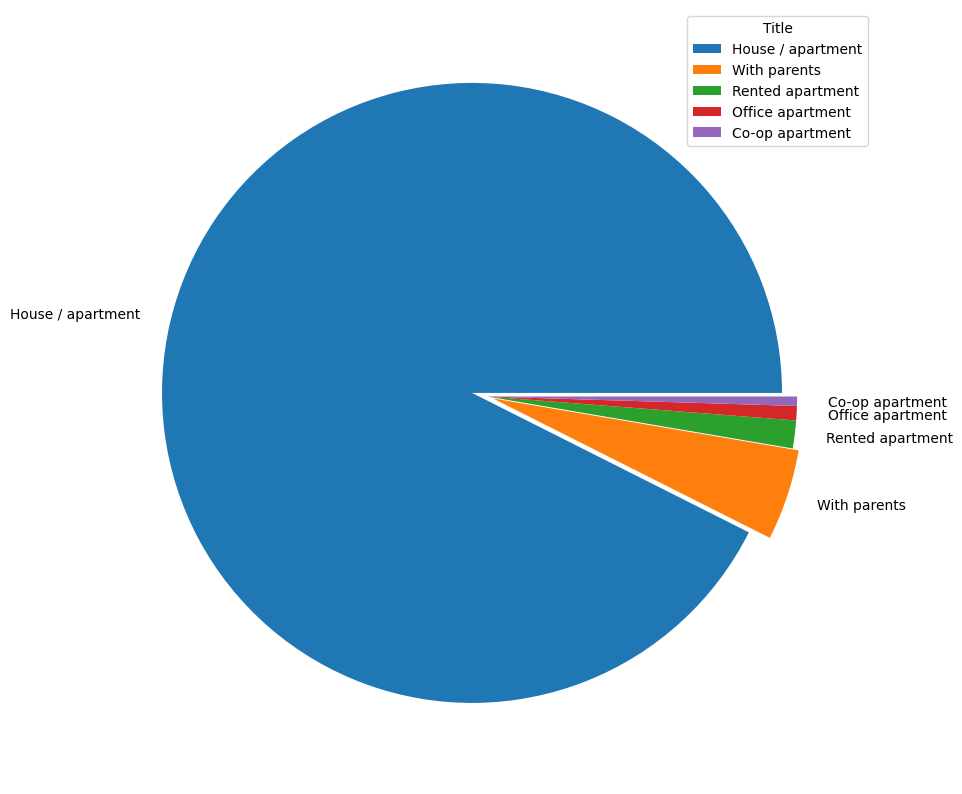

In [150]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['NAME_HOUSING_TYPE']=='House / apartment'
m=m.sum()
s=data['NAME_HOUSING_TYPE']=='With parents'
s=s.sum()
Cv=data['NAME_HOUSING_TYPE']=='Rented apartment'
Cv=Cv.sum()
sep=data['NAME_HOUSING_TYPE']=='Office apartment'
sep=sep.sum()
w=data['NAME_HOUSING_TYPE']=='Co-op apartment'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['House / apartment','With parents','Rented apartment','Office apartment','Co-op apartment']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

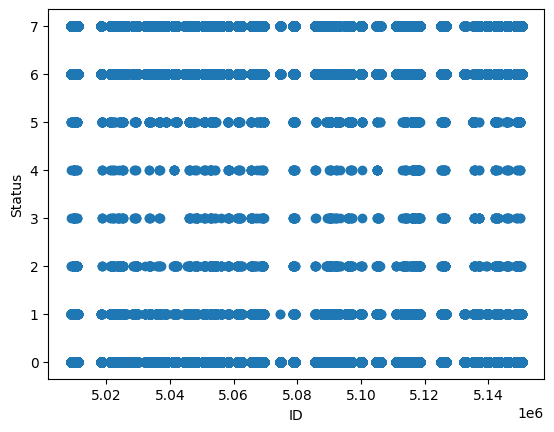

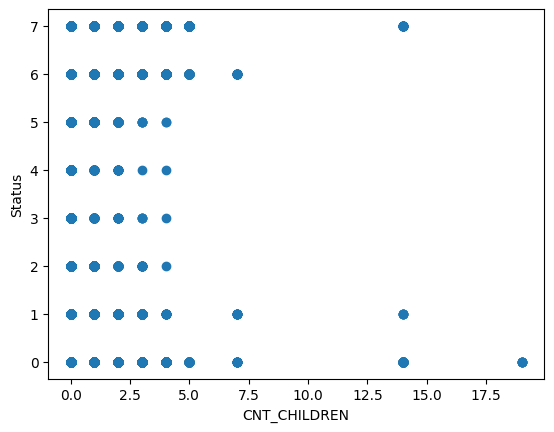

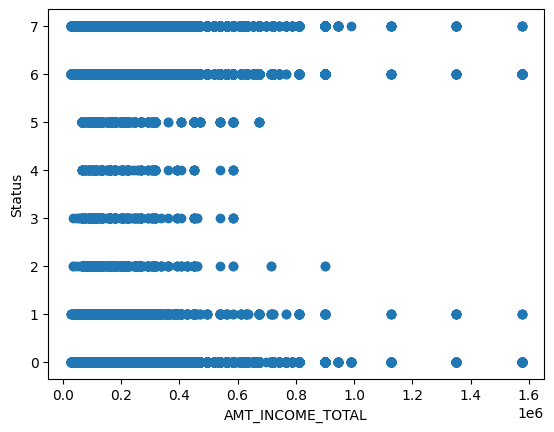

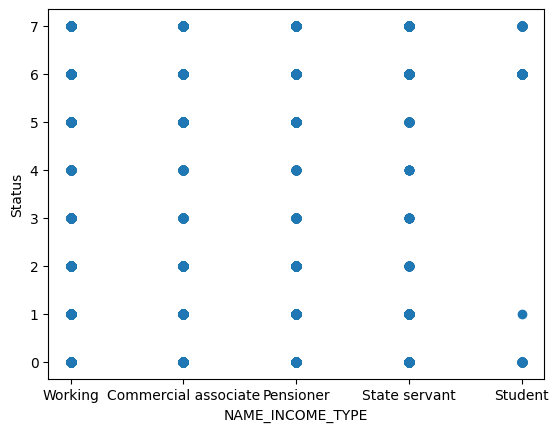

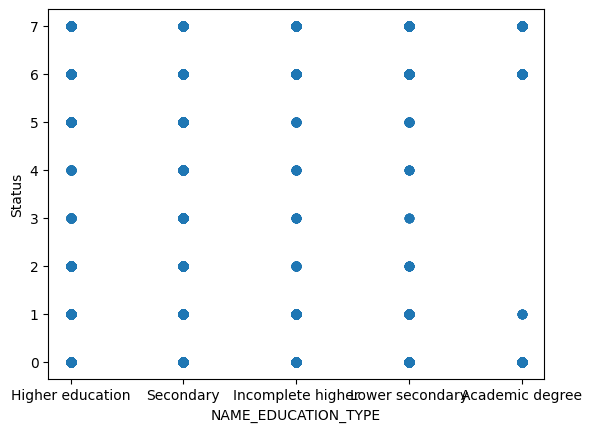

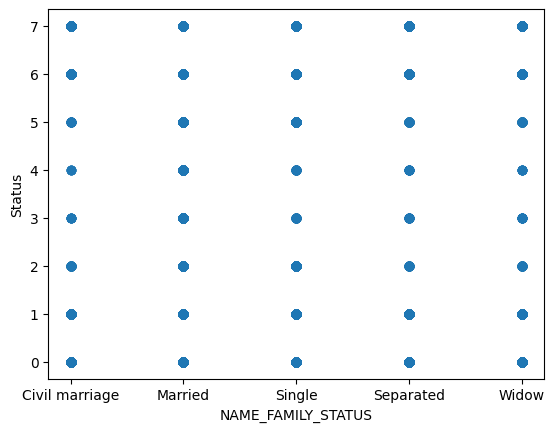

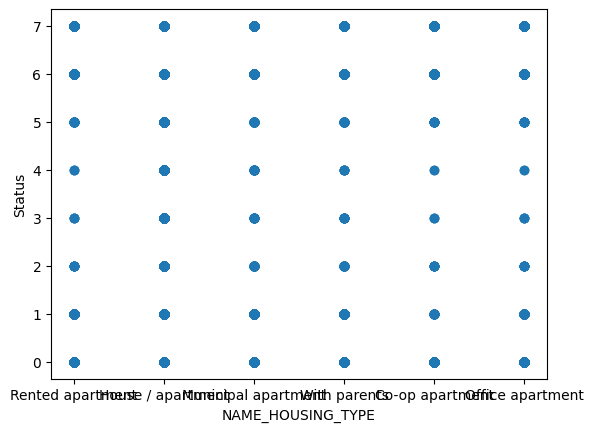

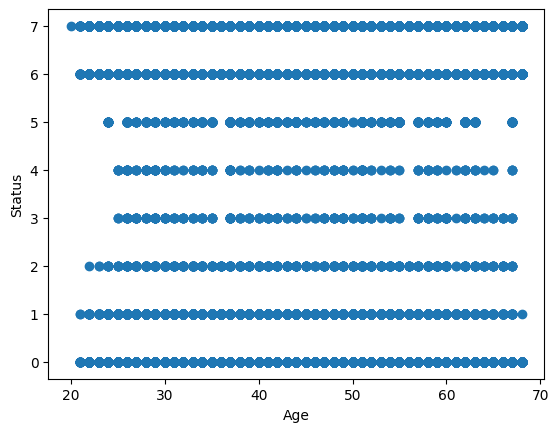

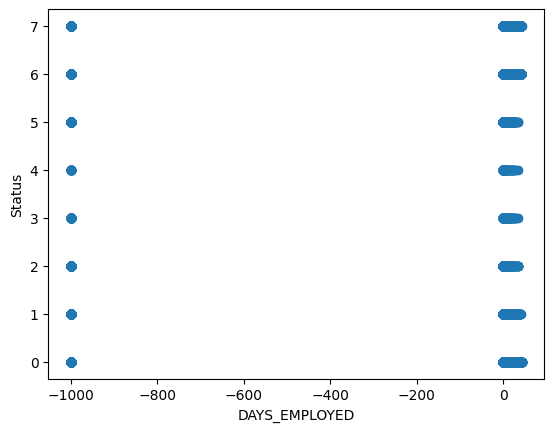

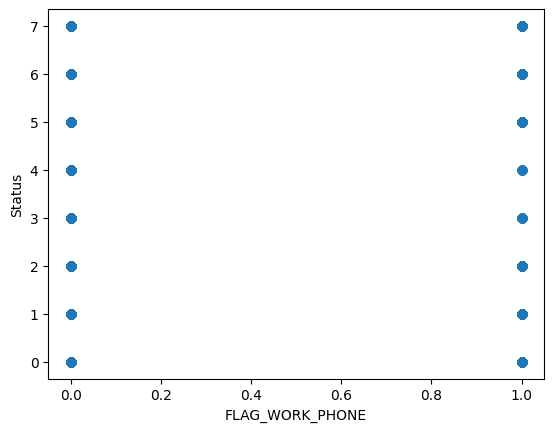

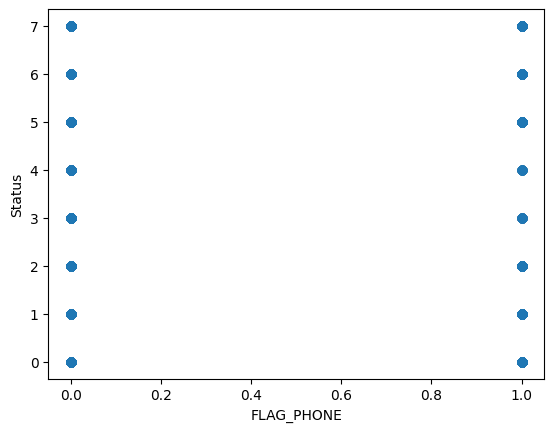

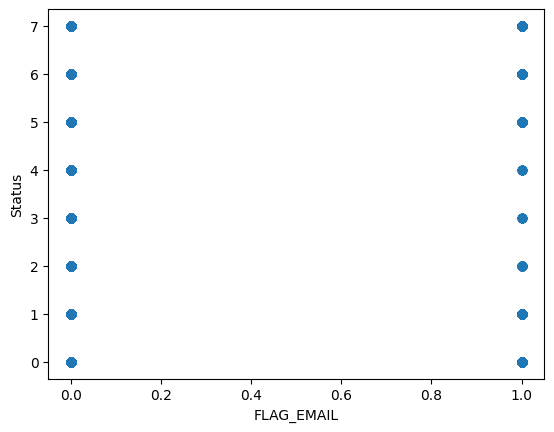

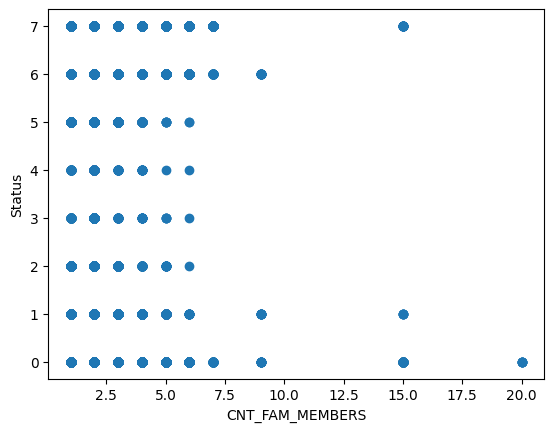

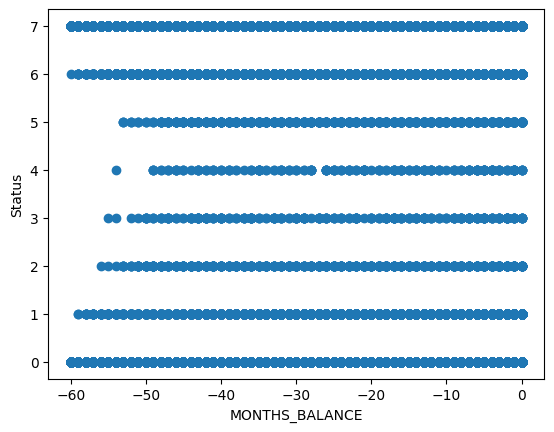

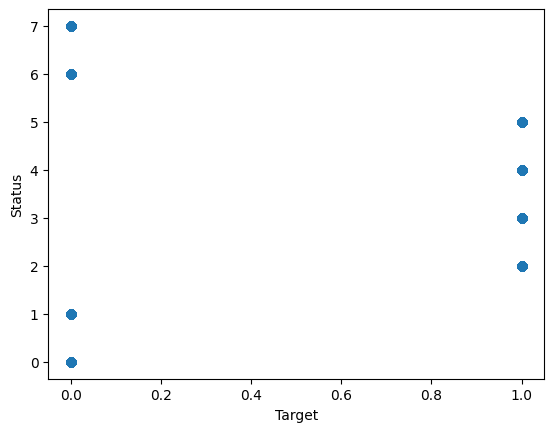

In [151]:
for feature in data.columns:
    if feature!='STATUS':
                dataset=data.copy()
                plt.scatter(dataset[feature],dataset['STATUS'])
                plt.xlabel(feature)
                plt.ylabel('Status')
                plt.show()

In [152]:
# let's make all data in one scale,for that we have to first change the categorical data to numrical data .
data.head()


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,0,6.0,0
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,-1,6.0,0
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,-2,6.0,0
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,-3,6.0,0
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,-4,6.0,0


In [153]:
## Let's formed a dictionary
lst = {'Working':1,'Commercial associate':2,'Pensioner':3,'State servant':4,'Student':5}
lst1 = {'Secondary':1,'Higher education':2,'Incomplete higher':3,'Lower secondary':4,'Academic degree':5}
lst2 = {'Married':1,'Single':2,'Civil marriage':3,'Separated':4,'Widow':5}
lst3 = {'House / apartment':1,'With parents':2,'Municipal apartment':3,'Rented apartment':4,'Office apartment':5,'Co-op apartment':6}

In [154]:
#lets replace it into numerical value
data.replace({'NAME_INCOME_TYPE':lst},inplace=True)
data.replace({'NAME_EDUCATION_TYPE':lst1},inplace=True)
data.replace({'NAME_FAMILY_STATUS':lst2},inplace=True)
data.replace({'NAME_HOUSING_TYPE':lst3},inplace=True)

In [155]:
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,0,427500.0,1,2,3,4,32,12,1,0,0,2.0,0,6.0,0
1,5008804,0,427500.0,1,2,3,4,32,12,1,0,0,2.0,-1,6.0,0
2,5008804,0,427500.0,1,2,3,4,32,12,1,0,0,2.0,-2,6.0,0
3,5008804,0,427500.0,1,2,3,4,32,12,1,0,0,2.0,-3,6.0,0
4,5008804,0,427500.0,1,2,3,4,32,12,1,0,0,2.0,-4,6.0,0


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CNT_CHILDREN         777715 non-null  int64  
 2   AMT_INCOME_TOTAL     777715 non-null  float64
 3   NAME_INCOME_TYPE     777715 non-null  int64  
 4   NAME_EDUCATION_TYPE  777715 non-null  int64  
 5   NAME_FAMILY_STATUS   777715 non-null  int64  
 6   NAME_HOUSING_TYPE    777715 non-null  int64  
 7   Age                  777715 non-null  int64  
 8   DAYS_EMPLOYED        777715 non-null  int64  
 9   FLAG_WORK_PHONE      777715 non-null  int64  
 10  FLAG_PHONE           777715 non-null  int64  
 11  FLAG_EMAIL           777715 non-null  int64  
 12  CNT_FAM_MEMBERS      777715 non-null  float64
 13  MONTHS_BALANCE       777715 non-null  int64  
 14  STATUS               777715 non-null  float64
 15  Target           

In [157]:
x=data.drop('Target',axis=1)
y=data['Target']
##########################################################################

In [160]:
data = pd.concat([data['Target'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(x), columns=feature_scale)],
                    axis=1)

In [161]:
data.head()


,Target,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,0,0.0,0.0,0.258721,0.0,0.25,0.5,0.6,0.25,0.970278,1.0,0.0,0.0,0.052632,1.000000,0.857143
1,0,0.0,0.0,0.258721,0.0,0.25,0.5,0.6,0.25,0.970278,1.0,0.0,0.0,0.052632,0.983333,0.857143
2,0,0.0,0.0,0.258721,0.0,0.25,0.5,0.6,0.25,0.970278,1.0,0.0,0.0,0.052632,0.966667,0.857143
3,0,0.0,0.0,0.258721,0.0,0.25,0.5,0.6,0.25,0.970278,1.0,0.0,0.0,0.052632,0.950000,0.857143
4,0,0.0,0.0,0.258721,0.0,0.25,0.5,0.6,0.25,0.970278,1.0,0.0,0.0,0.052632,0.933333,0.857143


In [162]:
data.Target.value_counts()

0    774887
1      2828
Name: Target, dtype: int64

In [163]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=12)

In [164]:
data.shape

(777715, 16)

In [165]:
x_res,y_res=smk.fit_resample(x,y)

In [166]:
x_res.shape

(1549704, 15)

In [167]:
y_res.shape

(1549704,)

In [168]:
from collections import Counter

In [169]:
print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

original dataset shape Counter({0: 774887, 1: 2828})
Resampled dataset shape Counter({0: 774852, 1: 774852})


In [170]:
from sklearn.model_selection import train_test_split

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=567)

In [172]:
x_train.shape,y_train.shape

((1239763, 15), (1239763,))

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



In [174]:
# List of classification models
model_list = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    XGBClassifier()
]


AttributeError: 'str' object has no attribute 'fit'

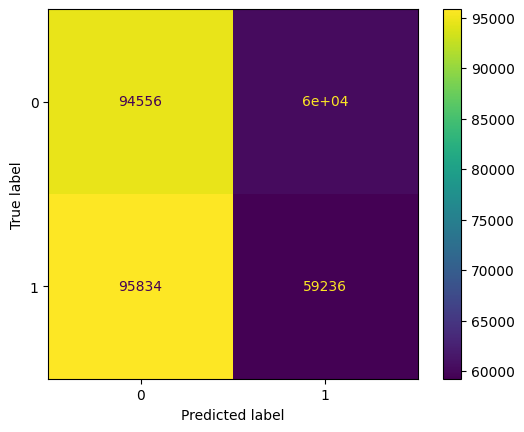

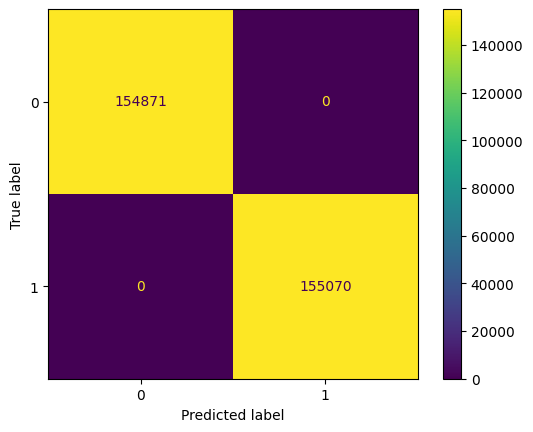

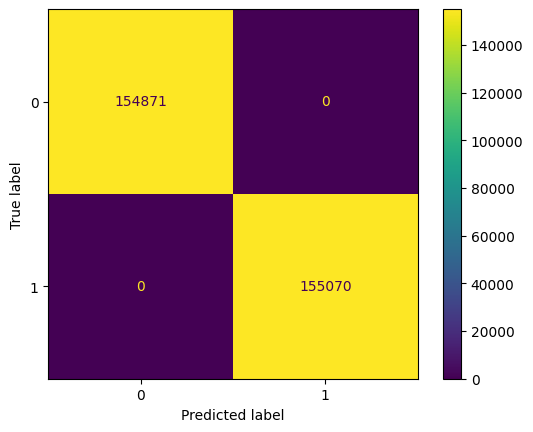

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC  # Support Vector Machine
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# Create instances of the models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
decision_tree_model = DecisionTreeClassifier()
#naive_bayes_model = GaussianNB()
#k_neighbors_model = KNeighborsClassifier()
#svm_model = SVC()  # Support Vector Machine
#gradient_boosting_model = GradientBoostingClassifier()
#XGB_Classifier=XGBClassifier()
model_list = [logistic_model, random_forest_model, decision_tree_model, #naive_bayes_model, 
              '''k_neighbors_model, svm_model, gradient_boosting_model''' ]

accuracy = []

for model in model_list:
    # Fit the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Display confusion matrix (optional)
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
    
    # Calculate accuracy and append to the list
    accuracy.append(accuracy_score(y_test, y_pred))

In [ ]:
accuracy

In [ ]:
#1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have trained and predicted using a model (e.g., logistic_model)
y_pred = logistic_model.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f'Accuracy Score: {accuracy:.4f}')
print(f'Precision Score: {precision:.4f}')
print(f'Recall Score: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')


In [ ]:
#2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have trained and predicted using a model (e.g., logistic_model)
y_pred = random_forest_model.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f'Accuracy Score: {accuracy:.4f}')
print(f'Precision Score: {precision:.4f}')
print(f'Recall Score: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')


In [ ]:
#3
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have trained and predicted using a model (e.g., logistic_model)
y_pred = decision_tree_model.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f'Accuracy Score: {accuracy:.4f}')
print(f'Precision Score: {precision:.4f}')
print(f'Recall Score: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

In [ ]:
#4
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have trained and predicted using a model (e.g., logistic_model)
y_pred =naive_bayes_model.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f'Accuracy Score: {accuracy:.4f}')
print(f'Precision Score: {precision:.4f}')
print(f'Recall Score: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

In [ ]:
#5
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have trained and predicted using a model (e.g., logistic_model)
y_pred =k_neighbors_model.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f'Accuracy Score: {accuracy:.4f}')
print(f'Precision Score: {precision:.4f}')
print(f'Recall Score: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

In [ ]:
import os

# استبدل "YourUsername" باسم مستخدم جهاز الكمبيوتر الخاص بك
desktop_path = os.path.join("C:/Users/YASSMIN/Desktop", "finalclass.csv")

data.to_csv(desktop_path, index=False)

In [ ]:
'''
import pandas as pd

# Assuming 'df' is your DataFrame with the 'model' column
model_mapping = {
    'A1': 1,
    'A6': 2,
    'A4': 3,
    'A3': 4,
    'Q3': 5,
    'Q5': 6,
    'A5': 7,
    'S4': 8,
    'Q2': 9,
    'A7': 10,
    'TT': 11,
    'Q7': 12,
    'RS6': 13,
    'RS3': 14,
    'A8': 15,
    'Q8': 16,
    'RS4': 17,
    'RS5': 18,
    'R8': 19,
    'SQ5': 20,
    'S8': 21,
    'SQ7': 22,
    'S3': 23,
    'S5': 24,
    'A2': 25,
    'RS7': 26,
    # Add more mappings as needed
}

# Apply the mapping to the 'model' column
df1['model'] = df1['model'].map(model_mapping)

# Display the DataFrame with the updated 'model' column
print(df1)
'''

In [ ]:
'''
unique_categories = df['model'].unique()
print("Unique Categories:", unique_categories)

'''

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label = le.fit_transform(df1['model'])
 
label